In [1]:
# Python Notebook for PHYS 321B Computational Assignment #1 

import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from matplotlib import rc


# extra stuff to make the plots look nice:

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

params = {"text.usetex" : True,
          "font.family" : "serif",
          "font.serif" : ["cmr10"],
          "font.size": 20
         }
plt.rcParams.update(params)
plt.rcParams['axes.formatter.use_mathtext'] = True

import os
os.environ["PATH"]
os.environ["PATH"] += os.pathsep + '/Library/TeX/texbin/'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'

# Set tick parameters using rcParams
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.minor.size'] = 4
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['ytick.minor.size'] = 4
plt.rcParams['xtick.major.width'] = 0.7
plt.rcParams['xtick.minor.width'] = 0.7
plt.rcParams['ytick.major.width'] = 0.7
plt.rcParams['ytick.minor.width'] = 0.7

plt.rcParams['font.weight'] = 'bold'


 #### 1. Consider the function $f (s) = \int^{\infty}_{0}e^{s(3x−x^3)}dx.$
Write a program which does a numerical integration to evaluate f (s).
Make a plot of f (s) as a function of s, with the theoretical result you
obtained in the regular assignment superimposed.
Submit your code and a copy of your plot.


In [2]:
# First we may define our function using the following:


def f_of_s(s, x0=0, xf=10000, N=10000):
    '''
    Takes a value for s 
    and a n initial and final
    x value such that x0 = 0 and 
    xf is sufficiently large to 
    look like infinity to g(x) 
    by default and returns a value for 
    f(s). N is number of Riemann sum
    rectangles.
    
    1. We need a form for the integrand
    2. We need to riemann integrate for 
        a specific value of s
    3. Return value of f for that value of s
    '''
    
    integrand = lambda x : np.exp(s*(3*x - x**3))
    
    # need to code in a simple integrator using midpoints:
    
    delta_x = (xf-x0) / N
    midpoints = np.linspace(delta_x/2, xf - delta_x/2, N)
    integral = np.sum(integrand(midpoints)*delta_x)
    
    return integral

# can absolutely use a for loop here but numpy vectorize is cleaner.
# creates a function that operates on each element of a list of input s values

f_s = np.vectorize(f_of_s)    

    

In [3]:
# now need to evaluate for many values of s:

# NOTE: Could plot for large values of s as noted in analytic problem 1
# this was not done as the two methods match almost the same apart 
# from reasonably small s values

s_init = 0; s_final = 10.; n_points =100

ss = np.linspace(s_init, s_final, n_points)

# as the approximate form of f(s) is asymptotic at
# s=0, we may start the vector slightly after (eps). We also
# choose a value for s_final that shows the features of the
# plot and does not just zoom to large f(s)

eps = 0.1

ss_app = np.linspace(eps + s_init,s_final, n_points)

# function evaluation:

f_s_vals = f_s(ss, 0, 10)

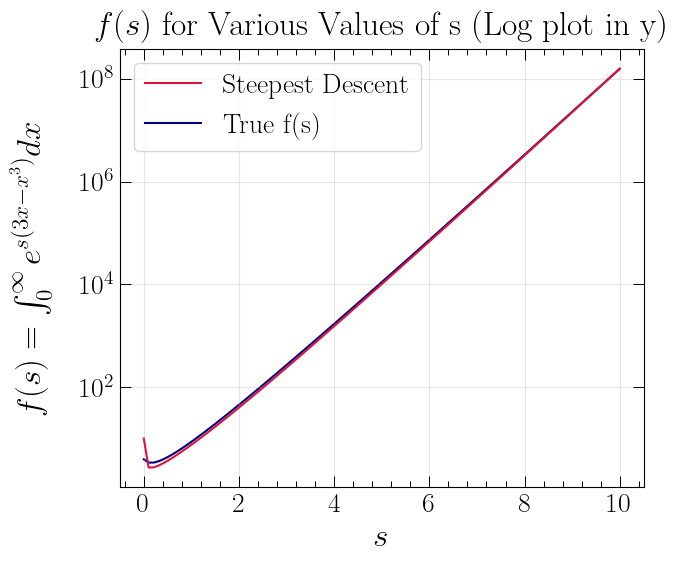

In [4]:
# initiates plotting parameters
width=8;height=7;ff, ax1 = plt.subplots(1,1);ff.set_figwidth(width);ff.set_figheight(height);ff.tight_layout(pad=4.0)

# labels
ax1.set_title(r"$f(s)$ for Various Values of s (Log plot in y)", pad = 10)
ax1.set_ylabel(r"$f(s) = \int^{\infty}_{0} e^{s(3x-x^3)}dx$",labelpad =20, fontsize=24)
ax1.set_xlabel(r"$s$",fontsize=24)

# actual plots
ax1.semilogy(ss,f_s_vals, c='crimson', label="Steepest Descent")

# from assignment 1 a):
ax1.semilogy(ss,np.exp(2*ss_app)/np.sqrt(ss_app)*np.sqrt(np.pi /3), 'navy', label=r"True f(s)",zorder=0)

# ticks and legend:
#ax1.yaxis.set_major_locator(MultipleLocator(1000));#ax1.yaxis.set_minor_locator(MultipleLocator(2))
ax1.xaxis.set_major_locator(MultipleLocator(2));ax1.xaxis.set_minor_locator(MultipleLocator(0.4))
ax1.tick_params(axis='both', direction="in")
ax1.tick_params(which="minor", axis="x", direction="in")
ax1.tick_params(which="minor", axis="y", direction="in")
ax1.xaxis.set_ticks_position('both') 
ax1.yaxis.set_ticks_position('both')
ax1.grid(True, alpha=0.3, zorder=10)
ax1.legend()
#ax1.set_ylim(0,44)
plt.show()


#### 2. Consider the function $f (x) = \sum_{n=0}^{11} a_n cos (nx)$
The length of the line $y = f (x)$ from x = 0 y = 0 to x = π y = 1 is
given by
$$
L = \int_0^{\pi} \sqrt{1+f'(x)^2}dx
$$

$a_{10}$ and $a_{11}$ can be found from $a_0$ through $a_{10}$ and the conditions that
$f (0) = 0$ and $f (π) = 1$. $\\$
Write a function that calculates $L(a_0, . . . , a_{10})$, 
and then write an algorithm that minimizes it by doing a gradient descent method: 

Calculate:
$$
\frac{\partial}{\partial a_i}
$$
for i between 0 and 9, and then update the vector of as by taking a step of length 0.01 in direction opposite that gradient.

Repeat enough times to get near the minimum.
Compare the minimized as with the theoretical values from the corresponding other question.


In [5]:
# First we can begin by defining the function f(x) with 12 terms:

def f_of_x(x_vals,a_ns):
    '''
    '''
    terms = [a_ns[i] * np.cos((i)*x_vals) for i in range(len(a_ns))]
    
    sum_of_terms = np.sum(terms)
    
    return sum_of_terms


now inside of f(x) we see the derivative of f_of_x. We can take the numerical derivative
or just do it analytically term-by-term:

$$
\frac{d}{dx} \sum_{n=0}^{11} a_n cos (nx) = -\sum_{n=0}^{11}n \cdot  a_n sin (nx)
$$

We can do this as we assume:

$$
a_n(x) = a_n
$$

In [6]:
# we may then define the function for the derivative:

def f_of_x_prime(x_in, a_ns):
    '''
    Takes a value of x and the 
    coefficient of the sum (a_ns)
    and calculates the analytic 
    derivative of f(x)
    returning the sum
    '''
    terms = (-1)*np.array([a_ns[i] * (i) * np.cos((i)*x_in) for i in range(len(a_ns))])
    
    sum_of_terms = np.sum(terms)
    
    return sum_of_terms

# now we need a form for L:

# can break into the integrand and then the integral:

def integrand(x_vals, a_ns):
    '''
    Takes a list of x_vals and 
    the given a_ns and calculates (using the
    f'(x) found above) what
    is under the root for each value of x.
    Returns a list of values corresponding
    to what is in the integrand.
    '''
    
    root = np.array([(np.sqrt(1+(np.array(f_of_x_prime(x_vals[i],a_ns))**2))) for i in range(len(x_vals))])
    
    return root

def L(x_vals, a_ns, N=100):
    '''
    Takes a list of x values
    and the given a_ns and calculates the 
    of the function f(x), returning a 
    scalar value.
    '''
    
    x0 = x_vals[0]
    xf = x_vals[-1]
    
    delta_x = (xf-x0) / N
    midpoints = np.linspace(delta_x/2, xf - delta_x/2, N)
    L_integral = np.sum(integrand(midpoints, a_ns)*delta_x)
    
    return L_integral



In [7]:
# we can build in a sanity check using the found values of a_ns from problem 1
# for the first 9 terms:

# list of x values from 0 to pi:

xx = np.linspace(0, np.pi, 1000)

# found values for the coefficients from the analytic assignment:

ans = np.array([1/2, -4/(np.pi**2), 0, -4/(9*np.pi*np.pi), 0, -4/(25*np.pi*np.pi), 0, -4/(49*np.pi*np.pi), 0, -4/(81*np.pi*np.pi),0,-4/(121*np.pi*np.pi)])

# now we may calculate the approximate expected L and the actual L using 
# the pythagorean theorem:

L_expected = L(xx,ans); L_actual = np.sqrt(np.pi*np.pi+1)

print(f"The expected truncated series length is: {L_expected:3f}")
print()
print(f"The actual length of the function is: {L_actual:3f}")

The expected truncated series length is: 3.284746

The actual length of the function is: 3.296908


now we want to code in a gradient descent method for an arbitrary initial 
guess of the coefficients:

We may define the ith derivative of the a's as:

$$
\frac{\partial}{\partial_i} L = \frac{L(a_i +\delta) - L(a_i)}{\delta}
$$

We will have to iterate this numerical gradient for all 9 a's. In principal, we
want to set delta to zero in the limit, but in practice we will choose a 
number with sufficient smallness. [Will play around with this to see what converges]


From before in assignment 1 we know that:

$$
0 = \sum_{n=0}^{11}a_n
$$

And:

$$
1 = \sum_{n=0}^{11} (-1)^n a_n
$$

Using both of these (shown in the analytic part of this assignment) we can show:

$$ 
a_0 = \frac{1}{2} - a_2-a_4-a_6-a_8-a_{10}
$$

And:

$$
a_{11} = -\frac{1}{2} -a_1 - a_3 - a_5 -a_7 -a_9
$$

Using these relations, we only need to minimize the 10 a's sandwiched by the above coefficients.



In [18]:
# first step is to define the 10-D gradient using the above form:

def grad(a_ns, delta=0.001,x= np.linspace(0, np.pi, 1000)):
    '''
    Takes vector of ans and 
    calculates the numerical gradient 
    using a parameter delta 
    that is sufficiently small.
    Returns a list of gradients.
    '''

    # initializes a list of derivatives:
    grad_list = [0 for i in range(len(a_ns))]
    
    # creates mutable version of the a_ns list:
    
    a_delta = [a_ns[i] for i in range(len(a_ns))]
    
    # lists through the length of a and calculates the ith derivative:
    
    for i in range(len(a_ns)):
        a_delta[i] += delta
        deriv = (L(x,a_delta) - L(x,a_ns))/delta
        grad_list[i] = deriv
        
        # resets delta list:
        a_delta = [a_ns[i] for i in range(len(a_ns))]
    
    return grad_list
    

def a_0(a_ns):
    '''
    Using the above equation, 
    this function takes the a_ns and 
    calculates a0 
    '''
    
    a0 = 1/2 - np.sum([a_ns[i+2] if i % 2 ==0 else 0 for i in range(len(a_ns)-2)])
    
    return a0

def a_11(a_ns):
    '''
    Similarly to a0, the equation 
    above for a11 is used here 
    to find its value
    '''
    
    a11 = -1/2 - np.sum([a_ns[i] if i % 2 !=0 else 0 for i in range(len(a_ns)-2)])
    
    return a11

We now want to implement a gradient descent optimization routine. To do this we use the following procedure:

1. Initialize all necessary variables.

2. Calculate $a_0$ and $a_{11}$ for the most current values for $a_{1-10}$ using the expressions from previous.

3. Compute the numerical gradient for coefficients $a_{1-10}$. This has the form $\vec{G} = \nabla_{a} L = \frac{\partial L}{\partial a_1} + \frac{\partial L}{\partial a_2} ... \frac{\partial L}{\partial a_{10}}$. 

4. Normalize the gradient vector: $ \hat{G} = \frac{\nabla_a L}{|\nabla_a L|} = \frac{ \frac{\partial L}{\partial a_1} + \frac{\partial L}{\partial a_2} ... \frac{\partial L}{\partial a_{10}}}{\left| \frac{\partial L}{\partial a_1} + \frac{\partial L}{\partial a_2} ... \frac{\partial L}{\partial a_{10}} \right|} $

5. Shift each value of the coefficients by a step length multiplied by the above gradient vector, component wise. For the ith component this looks like: $a^i_{n+1} = a_n^{i} - D \cdot \frac{\frac{\partial L}{\partial a_n^i}}{|\nabla_a L|}$. Or more generally: $ \vec{a}_{n+1}=\vec{a}_{n} - D\frac{\nabla_a L}{|\nabla_a L|} =\vec{a}_{n} - D\hat{G} $

6. [Optional to test for convergence] Calculate the new length, $L_{n+1}$, for the corresponding values of $ \vec{a}_{n+1}$.

7. Repeat the above steps N times until both $\vec{a}_{N}$ and $L_{N}$ are reasonably converged.

In [19]:
# now we can run it for N iterations with a step length of 0.01
# in the opposite direction of the gradient:

step_length = 0.01; N_iters = 600

# initializing the a variables. Start them all at 1 for simplicity:

a_arb = (-1)*np.ones(12); a_in = list(a_arb) # easier to work with a list

# initializes a test L variable that checks for convergence

l_test = np.zeros(N_iters)

# initializes a convergence check on the a's:

all_as = np.zeros((int(N_iters),12))

# now we loop N times:

for i in range(N_iters):
    
    # now change the first and last coefficient based on the current
    # values for a1...a10:  
    a_in[0] = a_0(a_in); a_in[-1]=a_11(a_in)
    
    # calculates the normalized gradient vector:
    gradient = np.array(grad(a_in))
    mag_grad = np.sqrt(np.sum([gradient[i]**2 for i in range(len(gradient))]))
    grad_vector = gradient / mag_grad  
    
    # shifts the current an's by -D*grad/mag_grad
    a_in -= step_length * grad_vector
    
    # convergence tests:
    l_test[i] = L(xx,a_in)
    all_as[i] = a_in

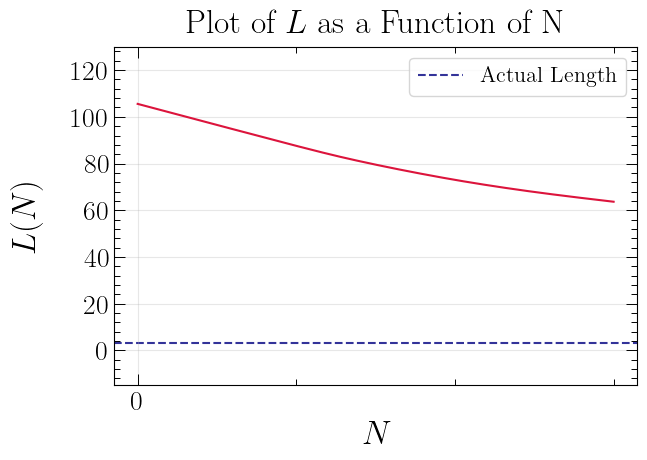

In [20]:

# initiates plotting parameters
width=8;height=6;ff, ax1 = plt.subplots(1,1);ff.set_figwidth(width);ff.set_figheight(height);ff.tight_layout(pad=4.0)

# labels
ax1.set_title(r"Plot of $L$ as a Function of N", pad = 10)
ax1.set_ylabel(r"$L(N)$",labelpad =20, fontsize=24)
ax1.set_xlabel(r"$N$",fontsize=24)

# actual plots:

ax1.plot(np.linspace(0,N_iters, N_iters), l_test, c='crimson', zorder=18)
ax1.axhline(L_actual, c='navy', linestyle='--',label="Actual Length", alpha=0.8, zorder=0)
# ticks and legend:
ax1.yaxis.set_major_locator(MultipleLocator(20));ax1.yaxis.set_minor_locator(MultipleLocator(4))
ax1.xaxis.set_major_locator(MultipleLocator(1000));ax1.xaxis.set_minor_locator(MultipleLocator(200))
ax1.tick_params(axis='both', direction="in")
ax1.tick_params(which="minor", axis="x", direction="in")
ax1.tick_params(which="minor", axis="y", direction="in")
ax1.xaxis.set_ticks_position('both') 
ax1.yaxis.set_ticks_position('both')
ax1.grid(True, alpha=0.3, zorder=10)
ax1.legend( prop={'size': 16})
ax1.set_ylim(-15,130)
plt.show()


In [21]:
#We can now compare the minimized a values with the theoretical values:

for i in range(len(a_in)):
    
    print(f"Theory a_{i}: {ans[i]:4f}", f"     Minimized a_{i}: {a_in[i]:4f}")

Theory a_0: 0.500000      Minimized a_0: 3.247802
Theory a_1: -0.405285      Minimized a_1: -0.957758
Theory a_2: 0.000000      Minimized a_2: -0.899868
Theory a_3: -0.045032      Minimized a_3: -0.814415
Theory a_4: 0.000000      Minimized a_4: -0.746270
Theory a_5: -0.016211      Minimized a_5: -0.682901
Theory a_6: 0.000000      Minimized a_6: -0.598848
Theory a_7: -0.008271      Minimized a_7: -0.499662
Theory a_8: 0.000000      Minimized a_8: -0.285151
Theory a_9: -0.005004      Minimized a_9: -0.363798
Theory a_10: 0.000000      Minimized a_10: -0.215678
Theory a_11: -0.003349      Minimized a_11: 2.810322


It is clear that $a_0$ is minimized quite well and dominates the convergence. 

For the sandwiched terms, it seems to be having trouble forcing the even terms to zero for the descent routine. 

Also, the value for $a_11$ seems to be much largely than it should be.

As can be seen in the final plot, there appears to be a lot of local minima that each a dips in an out of. 

With sufficiently large N, it is likely that a suitable global minima will be reached that achieves comparable L and $a_i$ values to theory but even with N= 6000 it takes a while.


Below, a plot of the difference between the actual and theoretical values at the found minima can be seen. In the final plot, the convergence of each parameter of the system is plotted with respect to the number of steps.

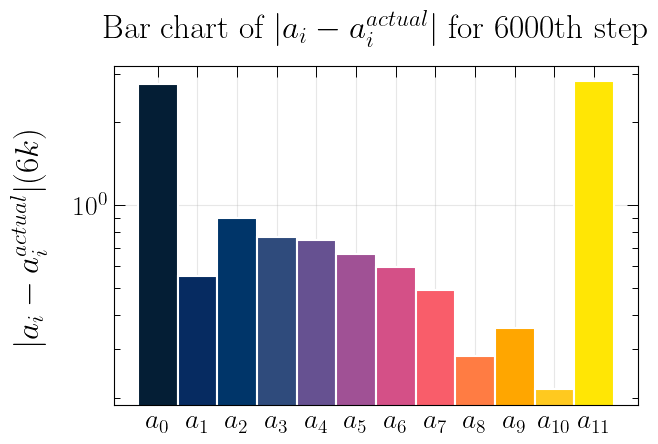

In [12]:
# initiates plotting parameters
width=8;height=6;ff, ax1 = plt.subplots(1,1);ff.set_figwidth(width);ff.set_figheight(height);ff.tight_layout(pad=4.0)

# labels
ax1.set_title(r"Bar chart of $|a_i-a_{i}^{actual}|$ for 6000th step", pad = 20)
ax1.set_ylabel(r"$|a_i-a_{i}^{actual}|(6k)$",labelpad =20, fontsize=24)
#ax1.set_xlabel(r"$N$",fontsize=24)

# colours and names:

cc = ['#041e35','#062b61','#003569','#2f4b7c','#665191','#a05195','#d45087','#f95d6a','#ff7c43','#ffa600','#ffc91f','#ffe605']

names = ['$a_0$','$a_1$','$a_2$','$a_3$','$a_4$','$a_5$','$a_6$','$a_7$','$a_8$','$a_9$','$a_{10}$','$a_{11}$']
# actual plots


ax1.bar(names, np.abs((all_as[-1] - ans)), color=cc, edgecolor='white', zorder=2, width=1, linewidth=1.5)

# ticks and legend:
#ax1.yaxis.set_major_locator(MultipleLocator(1000));#ax1.yaxis.set_minor_locator(MultipleLocator(2))
#ax1.xaxis.set_major_locator(MultipleLocator(1000));ax1.xaxis.set_minor_locator(MultipleLocator(250))
ax1.tick_params(axis='both', direction="in")
ax1.tick_params(which="minor", axis="x", direction="in")
ax1.tick_params(which="minor", axis="y", direction="in")
ax1.xaxis.set_ticks_position('both') 
ax1.yaxis.set_ticks_position('both')
ax1.grid(True, alpha=0.3, zorder=10)
#ax1.legend( prop={'size': 10}, loc='lower left')
ax1.set_yscale('log')

plt.show()


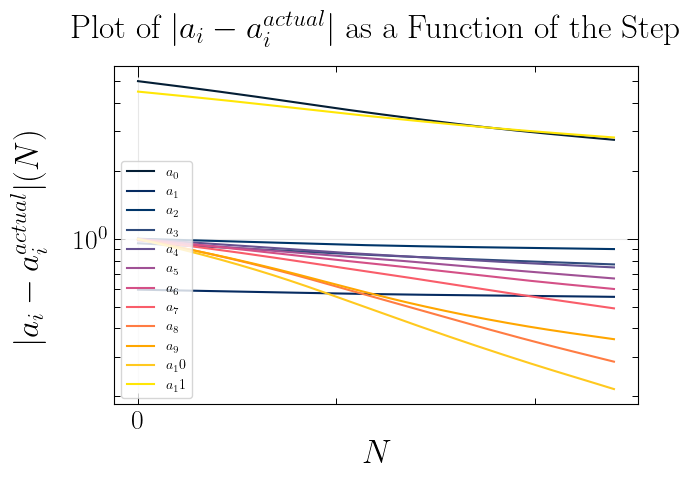

In [13]:
# initiates plotting parameters
width=8;height=6;ff, ax1 = plt.subplots(1,1);ff.set_figwidth(width);ff.set_figheight(height);ff.tight_layout(pad=4.0)

# labels
ax1.set_title(r"Plot of $|a_i-a_{i}^{actual}|$ as a Function of the Step", pad = 20)
ax1.set_ylabel(r"$|a_i-a_{i}^{actual}|(N)$",labelpad =20, fontsize=24)
ax1.set_xlabel(r"$N$",fontsize=24)

# colours:
cc = ['#041e35','#062b61','#003569','#2f4b7c','#665191','#a05195','#d45087','#f95d6a','#ff7c43','#ffa600','#ffc91f','#ffe605']
# actual plots

for i in range(len(all_as.T[0:12])):
    ax1.semilogy(np.linspace(0,N_iters, N_iters),np.abs((all_as.T[i] - ans[i])), label=f"$a_{i}$",c=cc[i] )

# ticks and legend:
#ax1.yaxis.set_major_locator(MultipleLocator(1000));#ax1.yaxis.set_minor_locator(MultipleLocator(2))
ax1.xaxis.set_major_locator(MultipleLocator(1000));ax1.xaxis.set_minor_locator(MultipleLocator(250))
ax1.tick_params(axis='both', direction="in")
ax1.tick_params(which="minor", axis="x", direction="in")
ax1.tick_params(which="minor", axis="y", direction="in")
ax1.xaxis.set_ticks_position('both') 
ax1.yaxis.set_ticks_position('both')
ax1.grid(True, alpha=0.3, zorder=10)
ax1.legend( prop={'size': 10}, loc='lower left')
plt.show()


In [14]:
min(l_test)

63.6398922687777

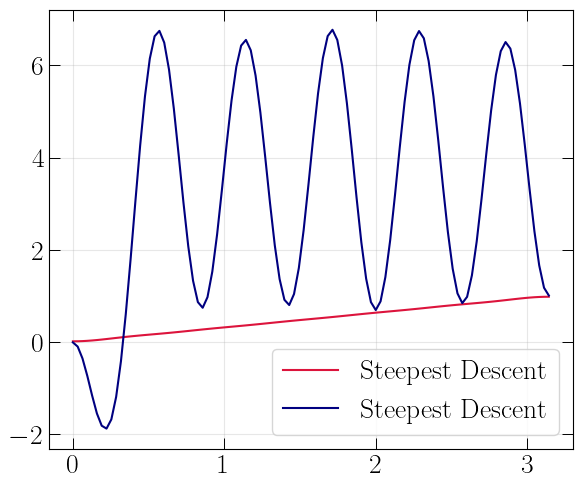

In [17]:
# we can now plot the generated a_ns with the analytic ones:

x_plot = np.linspace(0, np.pi, 100)

# initiates plotting parameters
width=8;height=7;ff, ax1 = plt.subplots(1,1);ff.set_figwidth(width);ff.set_figheight(height);ff.tight_layout(pad=4.0)

# labels
#ax1.set_title(r"$f(s)$ for Various Values of s", pad = 10)
#ax1.set_ylabel(r"$f(s) = \int^{\infty}_{0} e^{s(3x-x^3)}dx$",labelpad =20, fontsize=24)
#ax1.set_xlabel(r"$s$",fontsize=24)

# actual plots
ax1.plot(x_plot, [f_of_x(x_plot[i],ans) for i in range(len(x_plot))], c='crimson', label="Steepest Descent")
ax1.plot(x_plot, [f_of_x(x_plot[i],all_as[599]) for i in range(len(x_plot))], c='navy', label="Steepest Descent")

# ticks and legend:
#ax1.yaxis.set_major_locator(MultipleLocator(10));ax1.yaxis.set_minor_locator(MultipleLocator(2))
#ax1.xaxis.set_major_locator(MultipleLocator(0.5));ax1.xaxis.set_minor_locator(MultipleLocator(0.1))
ax1.tick_params(axis='both', direction="in")
ax1.tick_params(which="minor", axis="x", direction="in")
ax1.tick_params(which="minor", axis="y", direction="in")
ax1.xaxis.set_ticks_position('both') 
ax1.yaxis.set_ticks_position('both')
ax1.grid(True, alpha=0.3, zorder=10)
ax1.legend()
#ax1.set_ylim(0,44)
plt.show()
